Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

checking the different values that a column may have

In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Check Missing values

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

3.2 Check Duplicates

In [5]:
df.duplicated().sum()
# no duplicates

0

Adding columns for "Total Score" and "Average"

In [21]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [24]:
reading_full = df[df['reading_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()
math_full = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_full}')
print(f'Number of students with less than 20 marks in Writing: {writing_full}')
print(f'Number of students with less than 20 marks in Reading: {reading_full}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Therefore students have performed the worst in Maths
Best performance is in reading section

Compariosn of average scores wrt Gender using a histogram

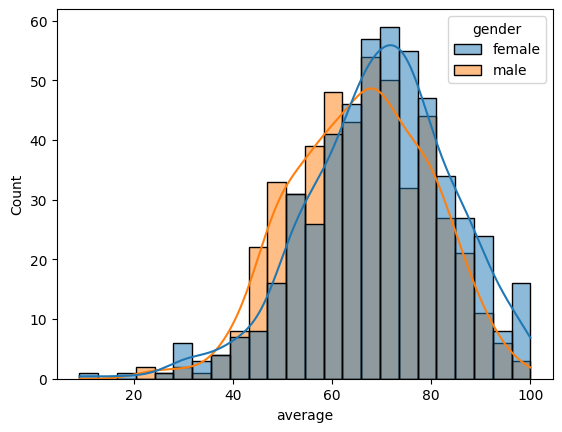

In [ ]:
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Distribbution of average scores

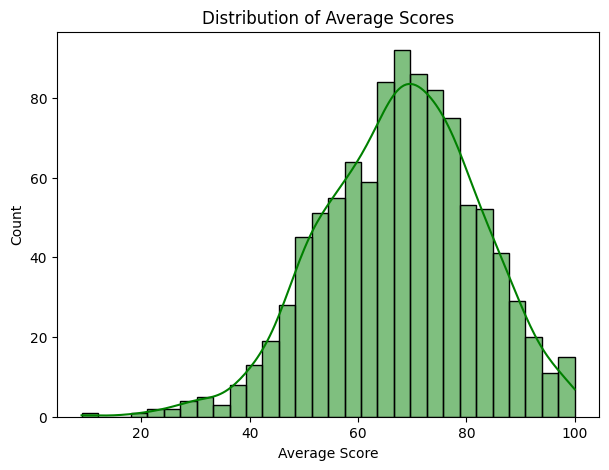

In [36]:
# Plot the histogram for 'average' scores
plt.figure(figsize=(7, 5))  # Set figure size
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')  # Green color for histogram
plt.xlabel("Average Score")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Average Scores")  # Title for the plot
plt.show()  # Display the plot


we infer that most students have an average score of 60-80

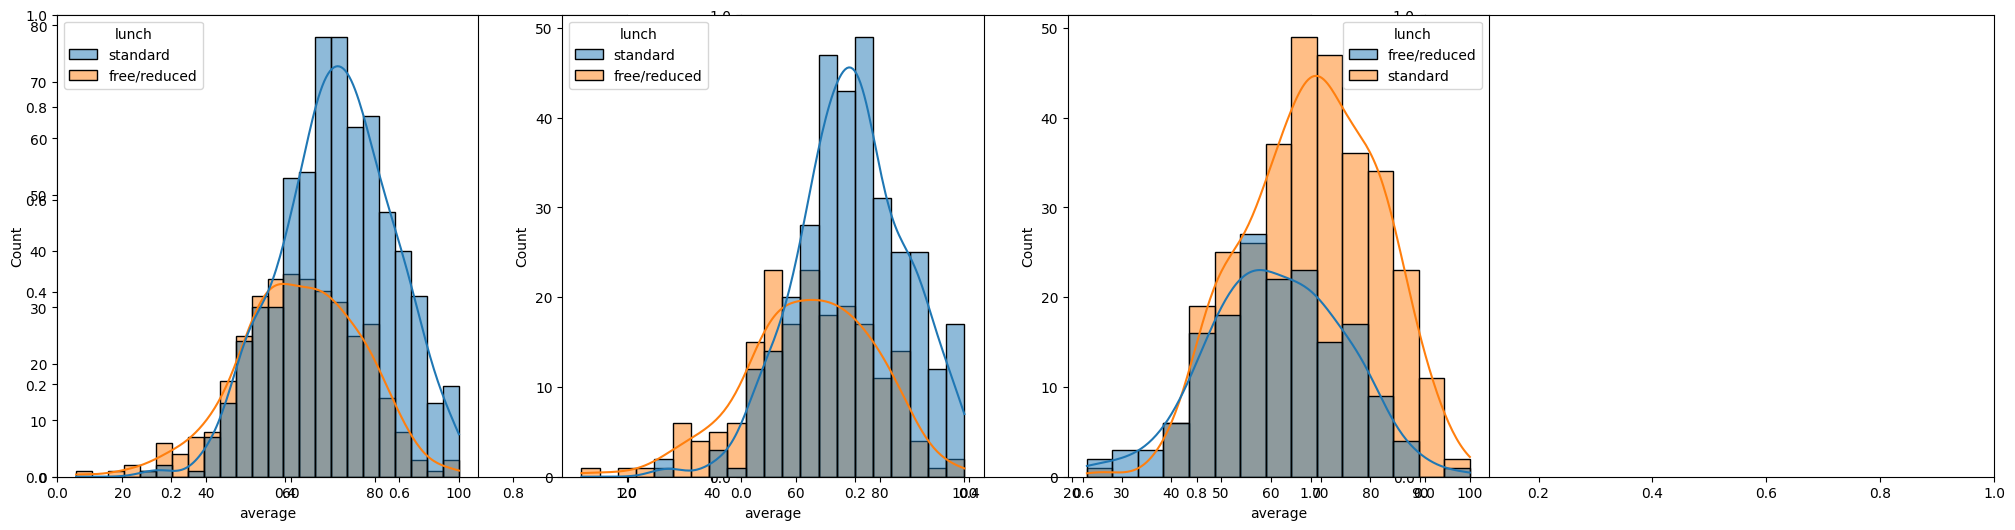

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

we infer that std lunch helps students perform better


Left Graph → Overall distribution of average scores across different race/ethnicity groups.
Middle Graph → Distribution of average scores for females, categorized by race/ethnicity.
Right Graph → Distribution of average scores for males, categorized by race/ethnicity.

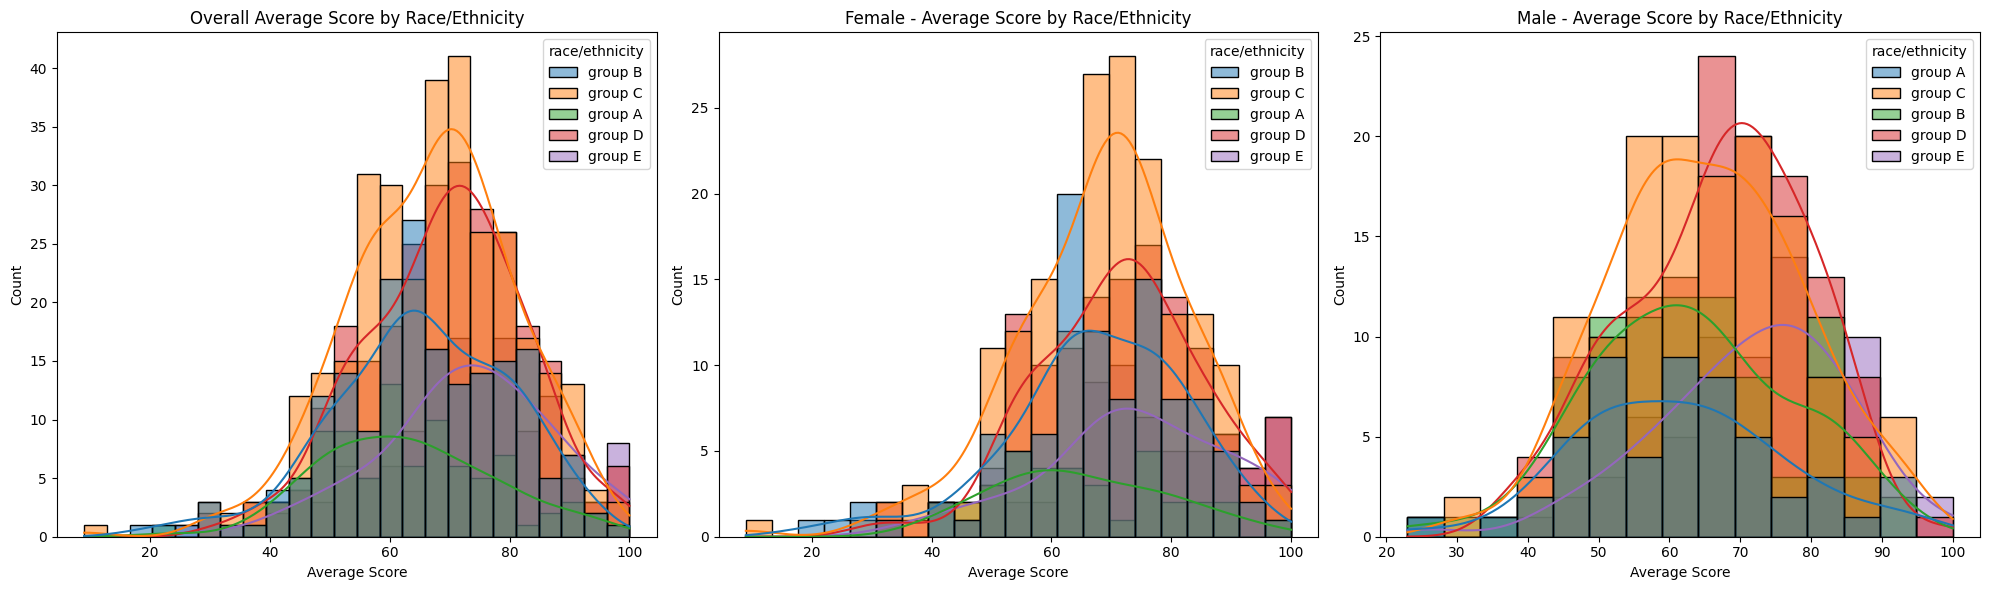

In [46]:

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Overall average score distribution by race/ethnicity
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axs[0])
axs[0].set_title("Overall Average Score by Race/Ethnicity")
axs[0].set_xlabel("Average Score")
axs[0].set_ylabel("Count")

# Plot 2: Female students' average score distribution by race/ethnicity
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race/ethnicity', ax=axs[1])
axs[1].set_title("Female - Average Score by Race/Ethnicity")
axs[1].set_xlabel("Average Score")
axs[1].set_ylabel("Count")

# Plot 3: Male students' average score distribution by race/ethnicity
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race/ethnicity', ax=axs[2])
axs[2].set_title("Male - Average Score by Race/Ethnicity")
axs[2].set_xlabel("Average Score")
axs[2].set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


we infer that Group A Males and Females perform better over all

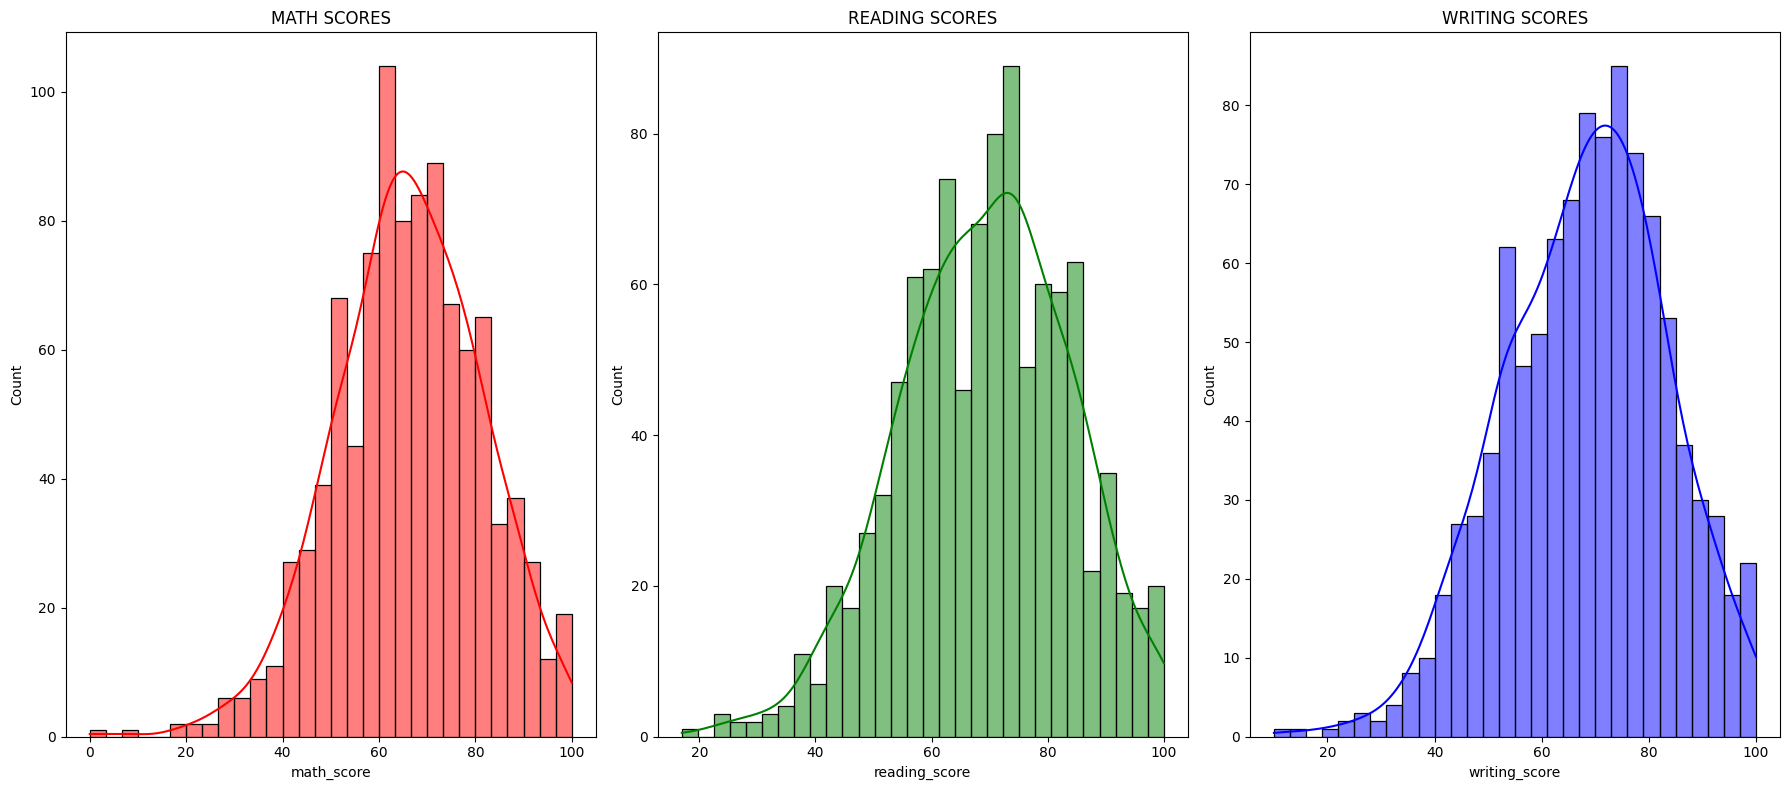

In [49]:
plt.figure(figsize=(18, 8))

# Math Scores - Histogram
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.histplot(df['math_score'], bins=30, kde=True, color='red')

# Reading Scores - Histogram
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.histplot(df['reading_score'], bins=30, kde=True, color='green')

# Writing Scores - Histogram
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.histplot(df['writing_score'], bins=30, kde=True, color='blue')

plt.tight_layout()
plt.show()


we infer that more people tendd to get higher in writing than other subjects

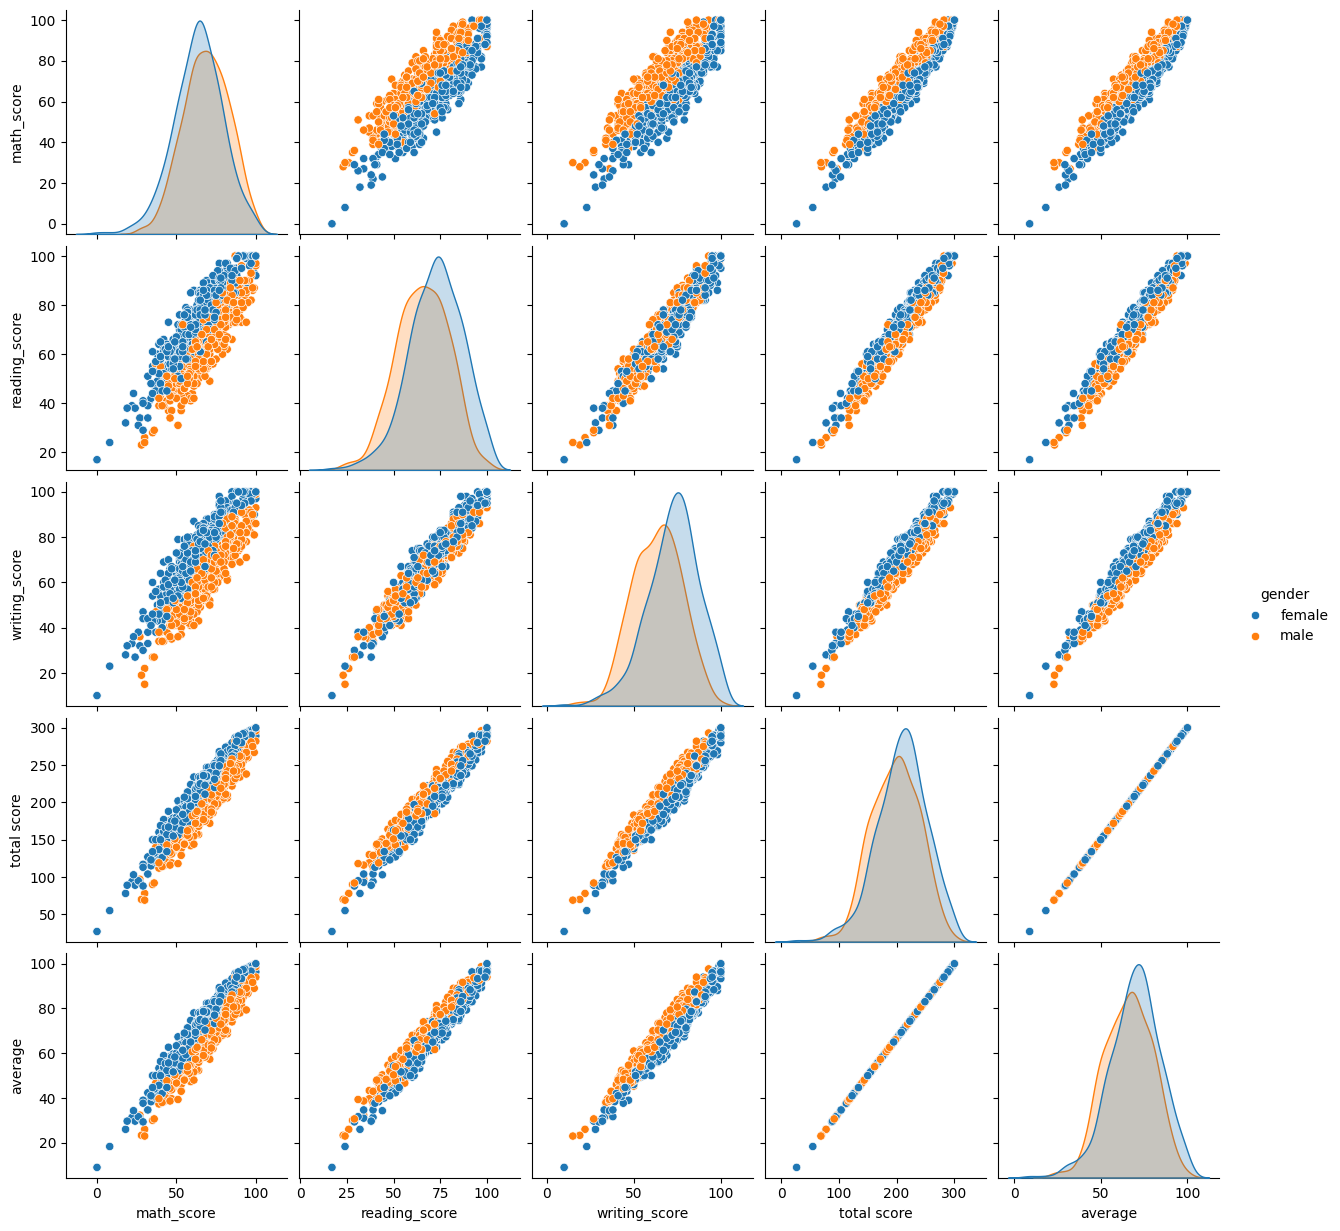

In [54]:
sns.pairplot(df,hue = 'gender')
plt.show()

The diagonal plots are KDE (Kernel Density Estimation plots)  - they shoe the distribution of that variable
rest are scatter plots.
All plots are drawn with respect to gender
blue - male
green - female 
This explains how each variable depends on the other variable.


We observe mostly linear relationships
For example , total_score is proportional to math_Score
    Students with higher math scores also tend to have higher reading scores. Some variance exists.
    Similar positive correlation: Higher math scores → Higher writing scores.

Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.

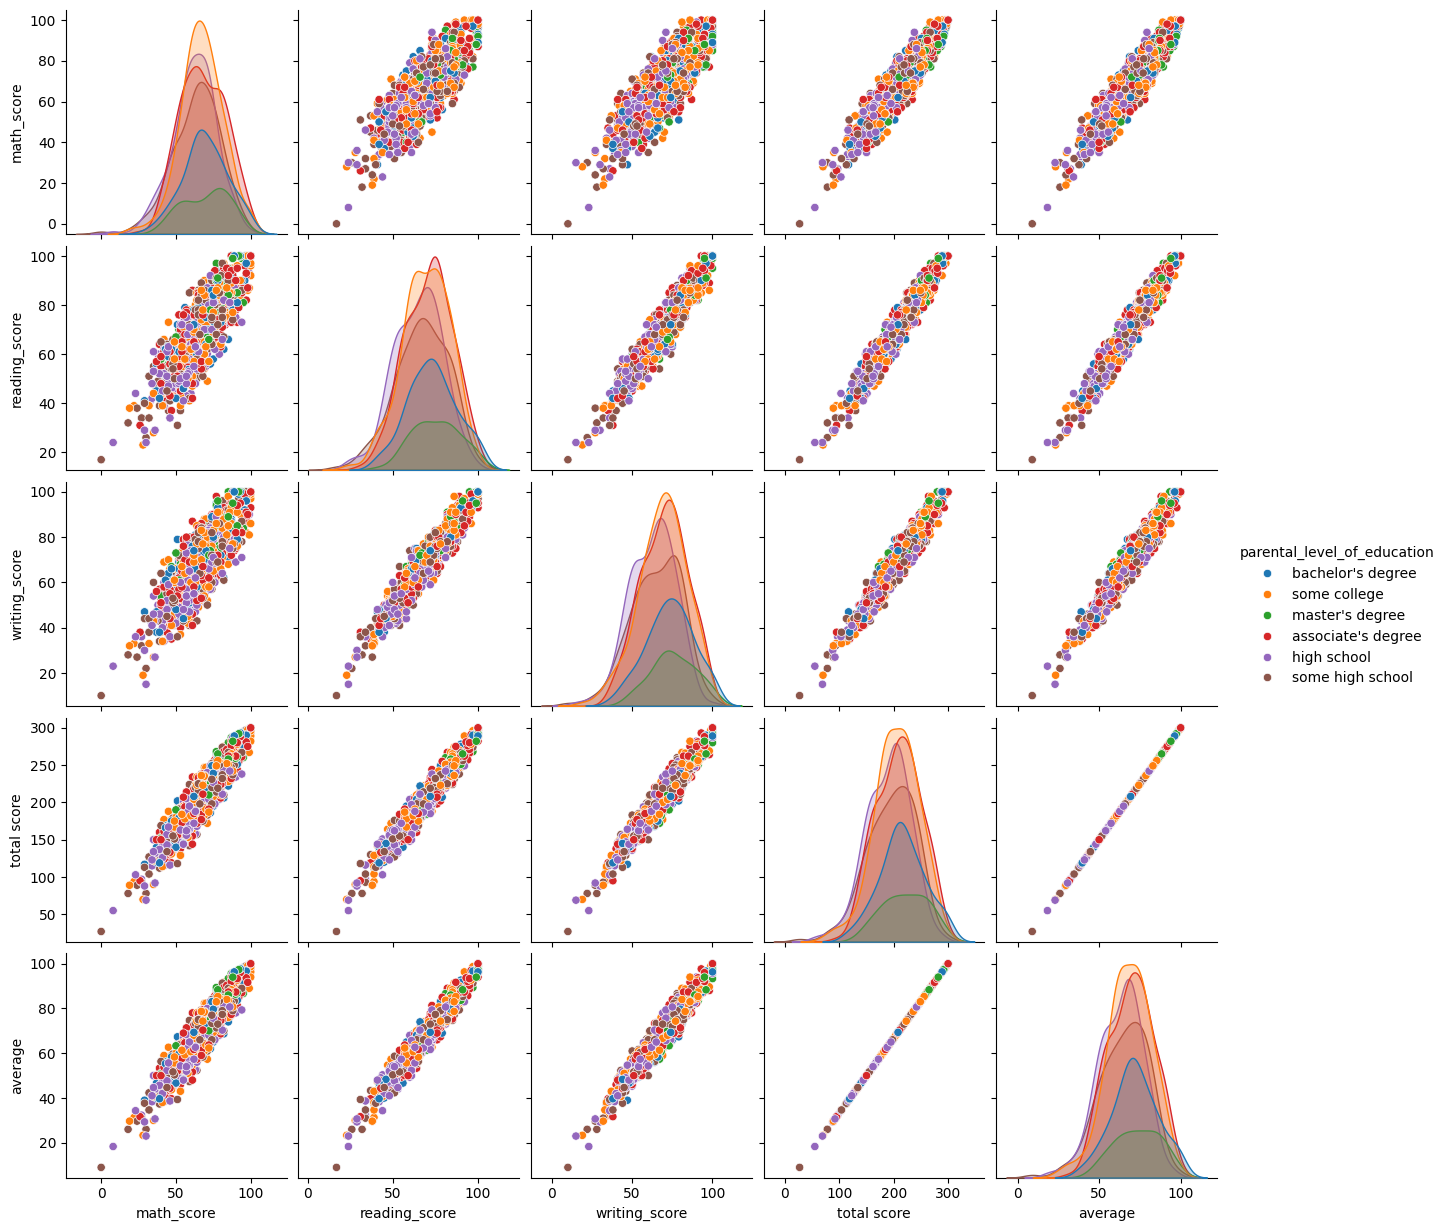

In [55]:

sns.pairplot(df,hue = 'parental_level_of_education')
plt.show()